In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-poluation/air_pollution new.csv


In [2]:
df = pd.read_csv('/kaggle/input/countries-poluation/air_pollution new.csv')

In [3]:
df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13.0,11.0,8.8,8.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     6985 non-null   object
 1   country  6985 non-null   object
 2   2017     6985 non-null   object
 3   2018     6985 non-null   object
 4   2019     6985 non-null   object
 5   2020     6985 non-null   object
 6   2021     6985 non-null   object
 7   2022     6985 non-null   object
 8   2023     6985 non-null   object
dtypes: object(9)
memory usage: 491.3+ KB


In [6]:
df.describe()

,city,country,2017,2018,2019,2020,2021,2022,2023
count,6985,6985,6985,6985,6985,6985,6985,6985,6985
unique,6852,133,504,497,548,534,616,666,649
top,Hamilton,USA,0,0,0,0,0,8.4,8.8
freq,6,2612,4852,4681,3337,3125,786,87,91


In [7]:
columns = df.columns[2:]
for i in columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     6985 non-null   object 
 1   country  6985 non-null   object 
 2   2017     6975 non-null   float64
 3   2018     6975 non-null   float64
 4   2019     6971 non-null   float64
 5   2020     6970 non-null   float64
 6   2021     6944 non-null   float64
 7   2022     6913 non-null   float64
 8   2023     6921 non-null   float64
dtypes: float64(7), object(2)
memory usage: 491.3+ KB


In [9]:
df.isnull().sum()

city        0
country     0
2017       10
2018       10
2019       14
2020       15
2021       41
2022       72
2023       64
dtype: int64

In [13]:
df.dropna(how='any',axis=0,inplace=True)
#Removing rows where any of the columns is null

Calculating Countries with the highest pollution population each year.

In [17]:
df.groupby('country')['2017'].mean().idxmax()

'Bangladesh'

In [26]:
df.groupby('country')['2017'].mean().sort_values(ascending=False).head()

country
Bangladesh    79.700000
Bahrain       62.500000
Uganda        54.300000
Pakistan      30.128571
China         29.020884
Name: 2017, dtype: float64

In [18]:
df.groupby('country')['2018'].mean().idxmax()

'Bangladesh'

In [27]:
df.groupby('country')['2018'].mean().sort_values(ascending=False).head()

country
Bangladesh     97.100000
Afghanistan    61.800000
Bahrain        59.800000
Pakistan       45.371429
Uganda         40.800000
Name: 2018, dtype: float64

In [19]:
df.groupby('country')['2019'].mean().idxmax()

'Bangladesh'

In [28]:
df.groupby('country')['2019'].mean().sort_values(ascending=False).head()

country
Bangladesh     83.300000
Afghanistan    58.800000
Pakistan       53.457143
Bahrain        46.800000
Uzbekistan     41.200000
Name: 2019, dtype: float64

In [20]:
df.groupby('country')['2020'].mean().idxmax()

'Bangladesh'

In [29]:
df.groupby('country')['2020'].mean().sort_values(ascending=False).head()

country
Bangladesh     77.1
Pakistan       50.9
Afghanistan    46.5
Bahrain        39.7
Uzbekistan     29.9
Name: 2020, dtype: float64

In [21]:
df.groupby('country')['2021'].mean().idxmax()

'Bangladesh'

In [30]:
df.groupby('country')['2021'].mean().sort_values(ascending=False).head()

country
Bangladesh    78.100000
Chad          77.600000
Pakistan      71.385714
Tajikistan    55.740000
Kyrgyzstan    54.600000
Name: 2021, dtype: float64

In [22]:
df.groupby('country')['2022'].mean().idxmax()

'Chad'

In [31]:
df.groupby('country')['2022'].mean().sort_values(ascending=False).head()

country
Chad            89.700000
Pakistan        69.257143
Bahrain         66.600000
Bangladesh      65.800000
Burkina Faso    63.000000
Name: 2022, dtype: float64

In [23]:
df.groupby('country')['2023'].mean().idxmax()

'Chad'

In [24]:
df.groupby('country')['2023'].mean().sort_values(ascending=False).head()

country
Chad          91.100000
Pakistan      70.228571
Bahrain       67.100000
Bangladesh    65.900000
Iraq          60.950000
Name: 2023, dtype: float64

In [35]:
df.city.nunique()

6738

In [36]:
mean_countries = pd.DataFrame(None)
for i in columns:
    mean_countries[i] = df.groupby('country')[i].mean()

In [38]:
mean_countries['2017'].sort_values(ascending=False).head()

country
Bangladesh    79.700000
Bahrain       62.500000
Uganda        54.300000
Pakistan      30.128571
China         29.020884
Name: 2017, dtype: float64

In [59]:
(df.loc[df.country=='Bangladesh',columns]).iloc[0].sort_values(ascending=False).index.tolist()

['2018', '2019', '2017', '2021', '2020', '2023', '2022']

Text(0.5, 1.0, 'Bar Graph of Pollution in Bangladesh')

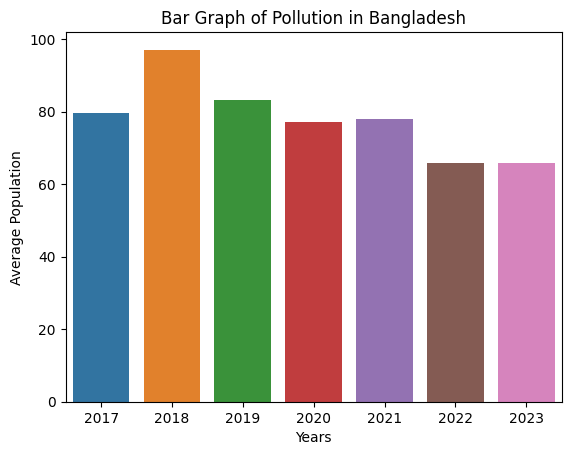

In [78]:
sns.barplot(df.loc[df.country=='Bangladesh',columns])
plt.xlabel('Years')
plt.ylabel('Average Population')
plt.title('Bar Graph of Pollution in Bangladesh')

Bangladesh - The Bar plot shows a decline in pollution after 2018.

Text(0.5, 1.0, 'Bar Graph of Pollution in Chad')

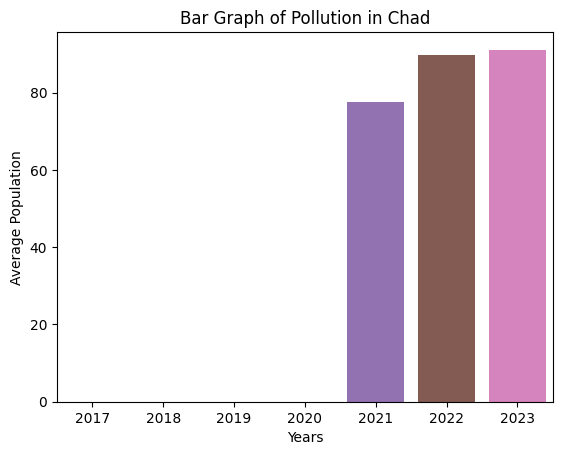

In [77]:
sns.barplot(df.loc[df.country=='Chad',columns])
plt.xlabel('Years')
plt.ylabel('Average Population')
plt.title('Bar Graph of Pollution in Chad')

Chad - Increase in pollution from 2021 to 2023; no data before 2021

<Axes: ylabel='country'>

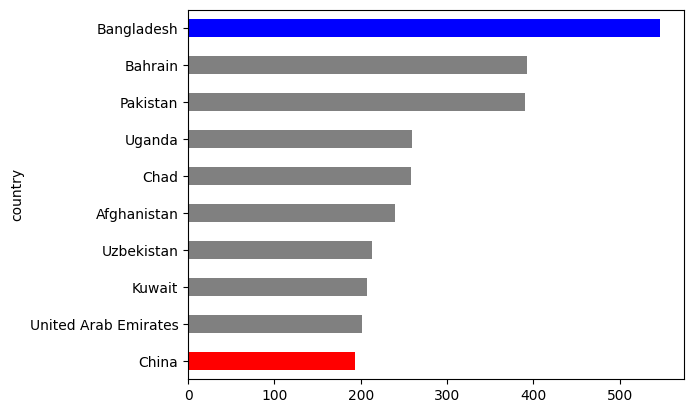

In [90]:
mean_countries.apply(lambda a: sum(a[columns]),axis=1).sort_values().tail(10).plot.barh(color=['red']+['grey']*8+['blue'])

Bangladesh has contributed the most to air-pollution; according to the data provided, with years from 2017 to 2023.